In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential

In [24]:
train_path='D:/Project AI/Covid19-dataset/train'
test_path='D:/Project AI/Covid19-dataset/test'

In [35]:
# Get classes name
classes_name=os.listdir(train_path)
classes_name

['Covid', 'Normal', 'Viral Pneumonia']

In [26]:
def plot_image(class_name):
    plt.figure(figsize=(15,10))
    for i , category in enumerate(class_name):
        img_path = train_path + '/' + category
        img_in_folder=os.listdir(img_path)
        
        first_img=img_in_folder[1]
        first_img_path=img_path + '/'+first_img 
        
        img=image.load_img(first_img_path)
        img_array=image.img_to_array(img)/255
        
        plt.subplot(1,3,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

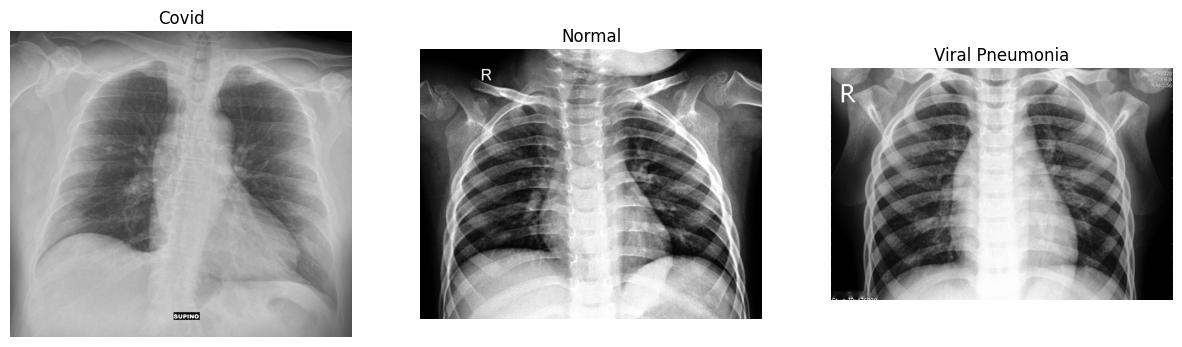

In [27]:
plot_image(classes_name)

In [28]:
data_generator=ImageDataGenerator(rescale=1/255)

In [29]:
train_data=data_generator.flow_from_directory(train_path,
                                              batch_size=16,
                                              target_size=(224,224))

Found 251 images belonging to 3 classes.


In [32]:
test_data=data_generator.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=1)

Found 66 images belonging to 3 classes.


In [37]:
train_data.image_shape

(224, 224, 3)

## Build cnn model

In [59]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[224,224,3]))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [60]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model_hist=model.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 437ms/step - accuracy: 0.5210 - loss: 5.1120 - val_accuracy: 0.6970 - val_loss: 0.5637
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 404ms/step - accuracy: 0.8927 - loss: 0.3309 - val_accuracy: 0.9394 - val_loss: 0.2510
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step - accuracy: 0.9757 - loss: 0.0538 - val_accuracy: 0.8939 - val_loss: 0.2502
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.9981 - loss: 0.0216 - val_accuracy: 0.9394 - val_loss: 0.2178
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step - accuracy: 0.9977 - loss: 0.0077 - val_accuracy: 0.9242 - val_loss: 0.2661


In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Model preformance Visualization",fontsize=20)
ax[0].plot(model_hist.history['loss'],label='Training Loss')
ax[0].plot(model_hist.history['val_loss'],label='Testing Loss')
ax[0].set_title("Training Loss VS. Testing Loss")

ax[1].plot(model_hist.history['accuracy'],label='Training Accuracy')
ax[1].plot(model_hist.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title("Training Accuracy VS. Testing Accuracy")
plt.show()

In [66]:
loos,acc=model.evaluate(train_data)
print(f'Accuracy of training is {acc*100}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 1.0000 - loss: 0.0062
Accuracy of training is 100.0


In [67]:
loos,acc=model.evaluate(test_data)
print(f'Accuracy of testing is {acc*100}')

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8710 - loss: 0.3086
Accuracy of testing is 92.42424368858337


In [85]:
testing_img="D:/Project AI/Covid19-dataset/test/Viral Pneumonia/0103.jpeg"

In [86]:
class_map=dict([value,key] for key,value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [87]:
def predication (testing_img,actual_label):
    test_img=image.load_img(testing_img,target_size=(224,224))
    test_img_arr=image.img_to_array(test_img)/255
    test_img_input=test_img_arr.reshape((1,test_img_arr.shape[0],
                                         test_img_arr.shape[1],
                                         test_img_arr.shape[2]))
    
    # Make predication 
    predicate_class=np.argmax(model.predict(test_img_input))
    predicated_map=class_map[predicate_class]
    
    plt.figure(figsize=(10,5))
    plt.imshow(test_img_arr)
    plt.grid()
    plt.axis('off')
    plt.title(f"Actual Label is: {actual_label} | predict label is: {predicated_map}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


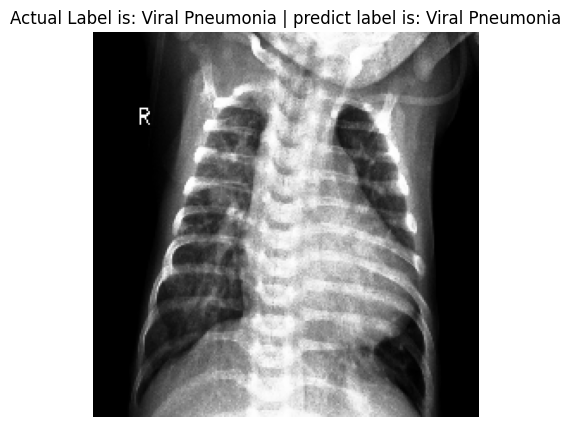

In [88]:
predication(testing_img,actual_label='Viral Pneumonia')